In [1]:
import numpy as np
import seaborn as sns


<Axes: >

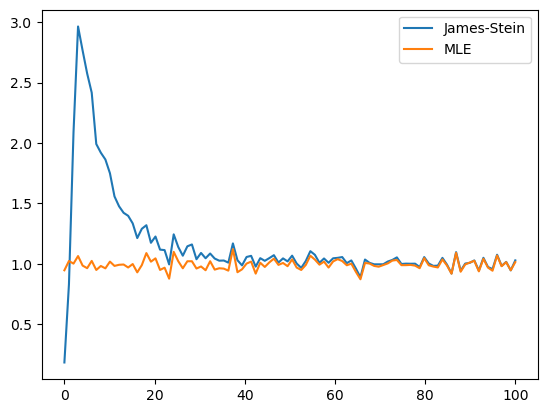

In [26]:
sample_size = 1
num_samples = 1000
p = 10
sigma = 1

def james_stein(X):
    return (1 - (p-2)/(np.linalg.norm(X, 2)**2)) * X

def f(x):
    #sample from multivariate normal
    mu = np.zeros(p)
    mu[0] = x
    X = np.random.multivariate_normal(mu, sigma**2 * np.eye(p), num_samples)
    #apply James-Stein estimator
    X_hat = np.apply_along_axis(james_stein, 1, X)
    return np.mean((X_hat[:,0]-x)**2), np.mean((X[:,0]-x)**2)

x = np.linspace(0, 100, 100)
y = np.array([f(xi) for xi in x])
sns.lineplot(x=x, y=y[:,0], label="James-Stein")
sns.lineplot(x=x, y=y[:,1], label="MLE")


In [138]:
sample = np.random.normal(6, 6, 10000)
mean = np.mean(sample)
sample_var = np.var(sample, ddof=1)
est = (mean)**2/sample_var - 1/len(sample)
print(est)

0.966623718903469
